        
# Investigating the factors influencing housing prices in a certain country.

In [1]:
import pandas as pd

In [22]:
import numpy as np

In [10]:
# Loading the dataset
df=pd.read_csv(r"C:\Users\ESTHER\Desktop\2WITU COHORT 3\Year one\semester  two\Intermediate Data science\Data science project assignment\Housing dataset/Housing.csv")

In [11]:
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7229300521  20141013T000000  231300.0         2       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

 # Data Preprocessing

In [45]:
# Select rows in the DataFrame where at least one value is missing across any column.
df[df.isna().any(axis=1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
# Drop the 'id' column from the DataFrame.
df = df.drop(['id'],axis=1)

In [30]:
# Display the first 5 rows of the DataFrame.
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
# Display the last 5 rows of the DataFrame.
df.tail(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,20141015,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Extract the date portion from the 'date' column by splitting on 'T' and taking the first part.
df['date'] = df['date'].str.split('T').str[0]

In [33]:
# Convert the 'date' column to integer data type.
df['date'] = df['date'].astype(int)

In [34]:
# Display the first 5 rows of the DataFrame.
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
# Print a concise summary of the DataFrame including data types and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int32  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Data analysis

In [49]:
import seaborn as sns

In [50]:
import matplotlib.pyplot as plt

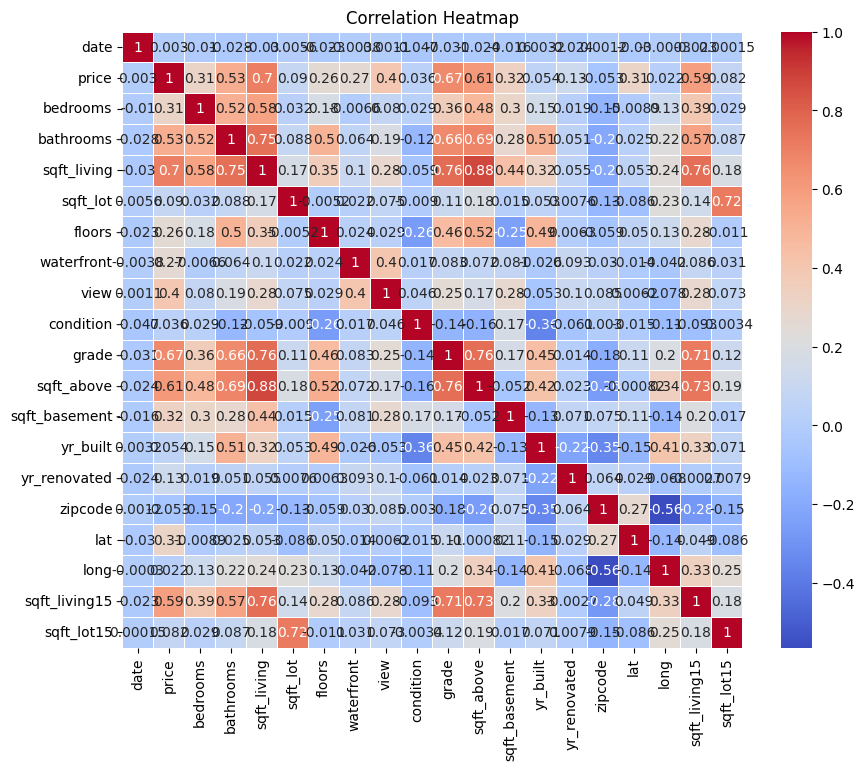

In [51]:
# Visualize correlations between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

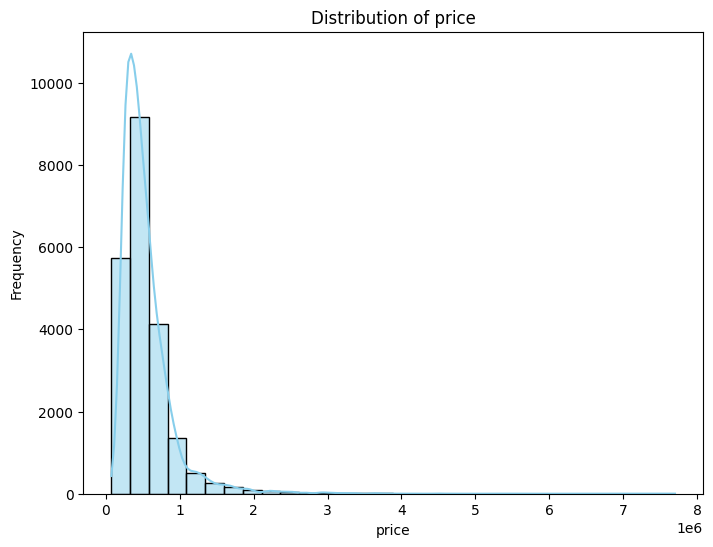

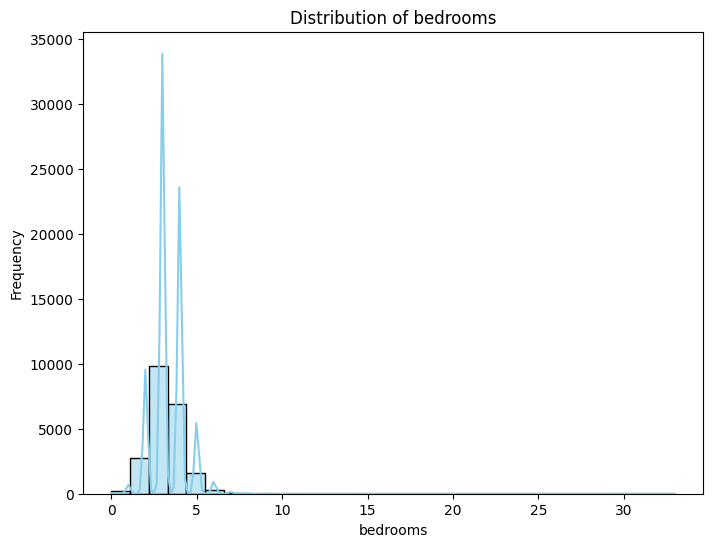

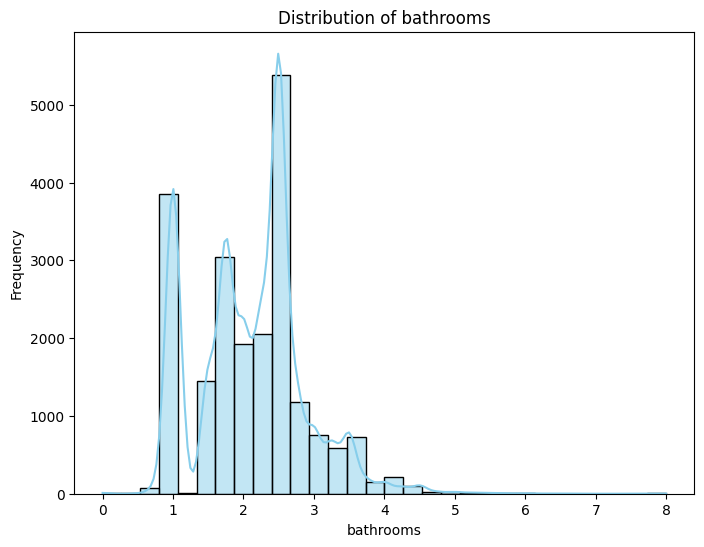

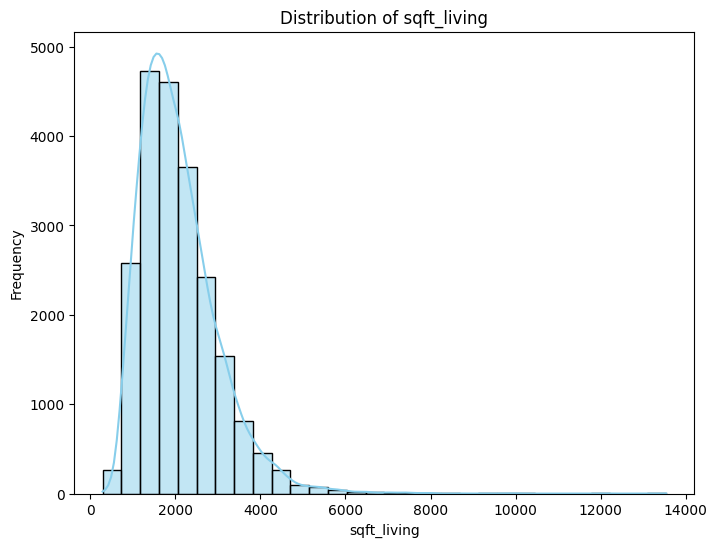

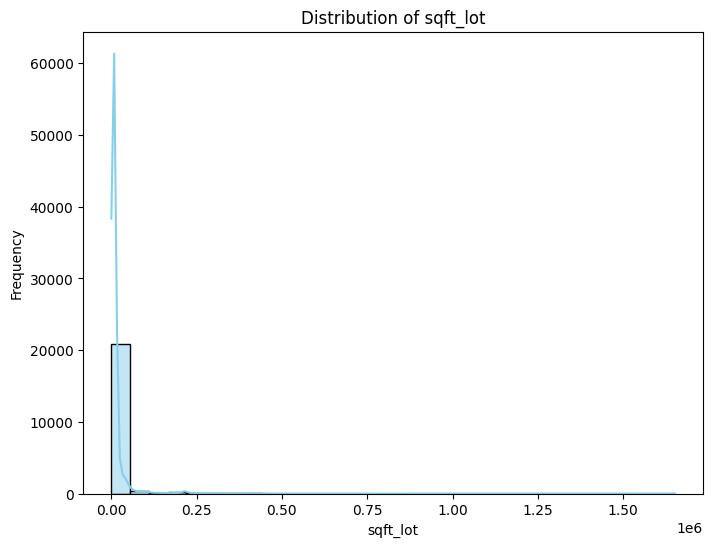

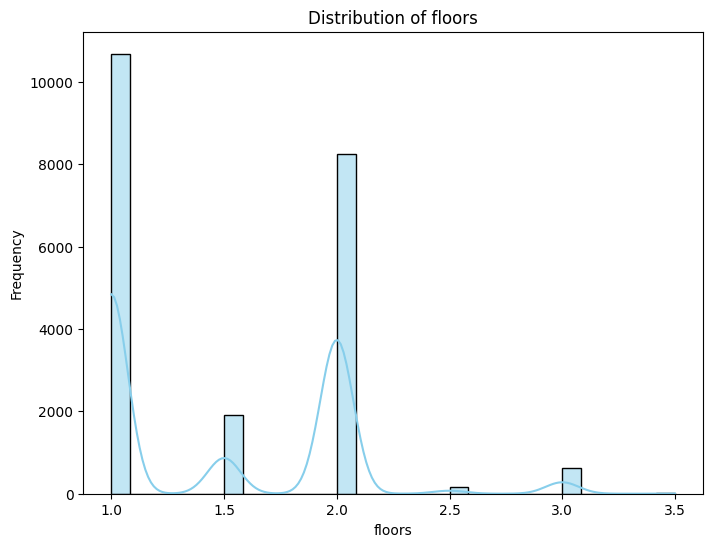

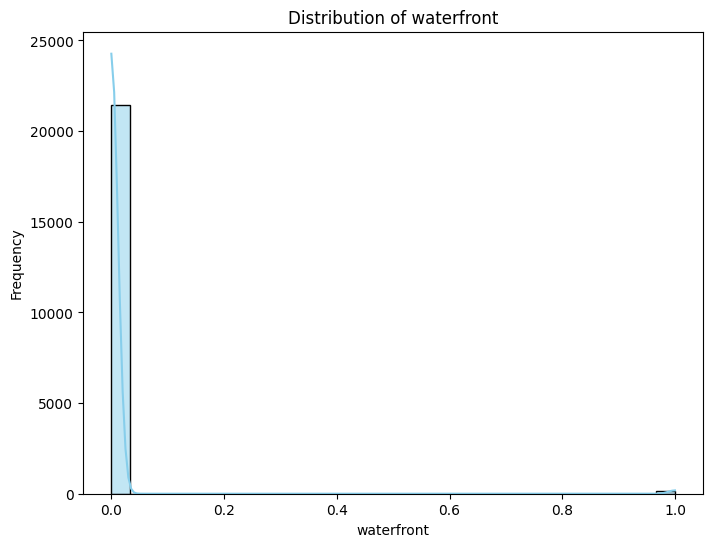

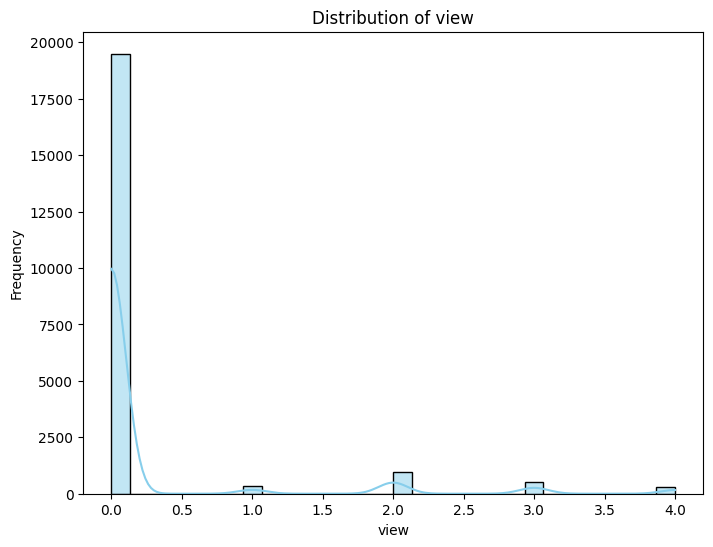

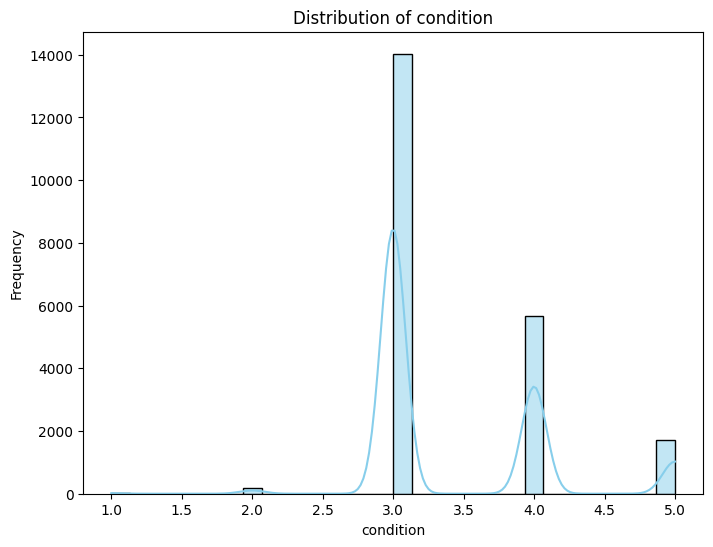

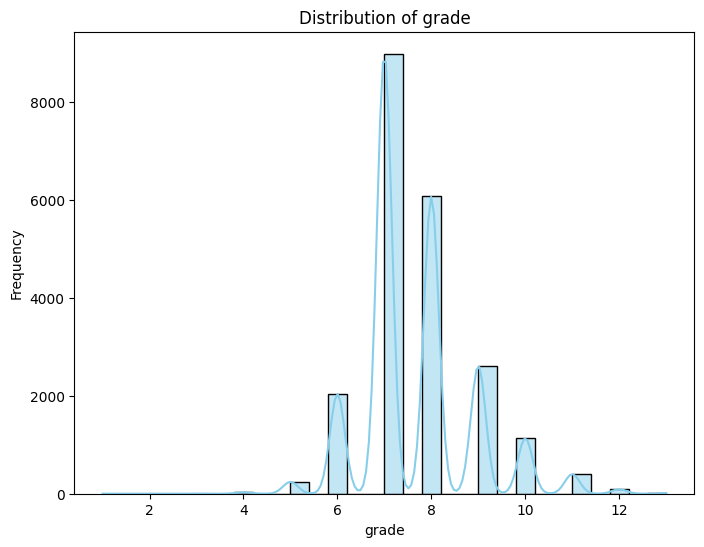

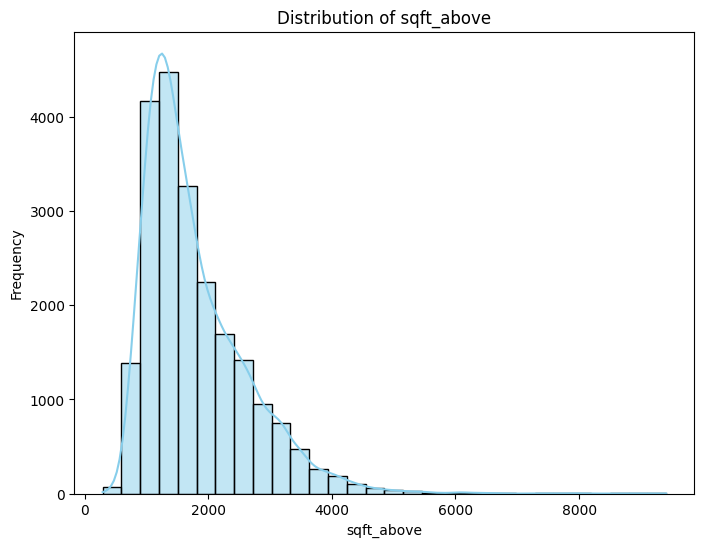

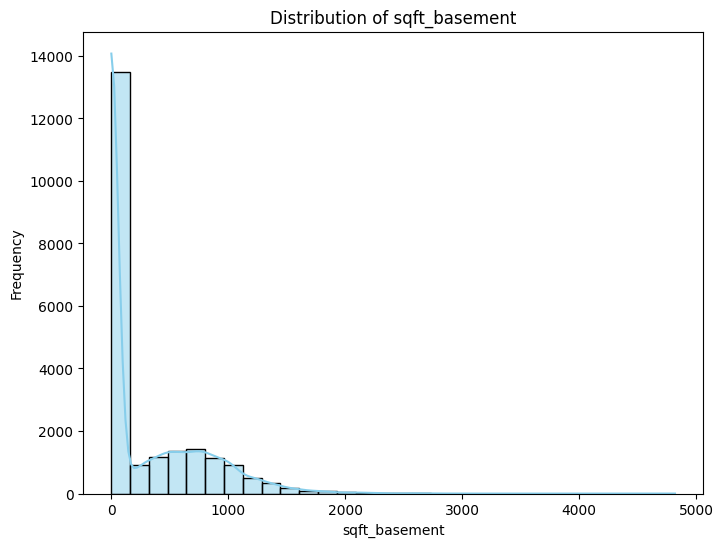

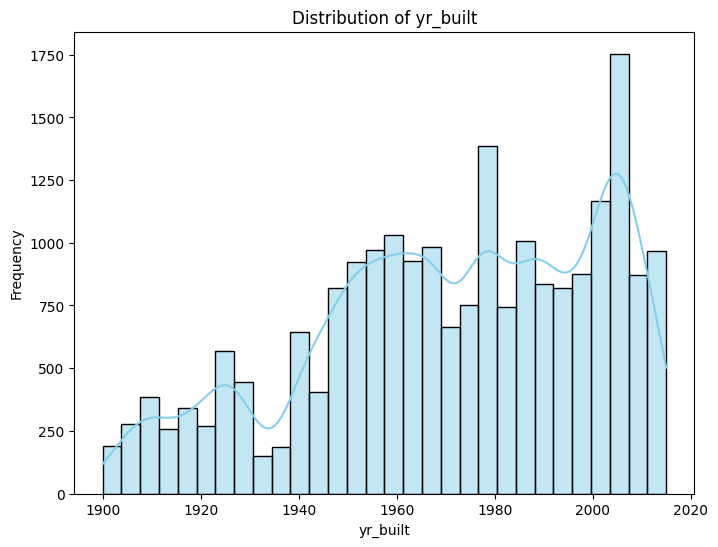

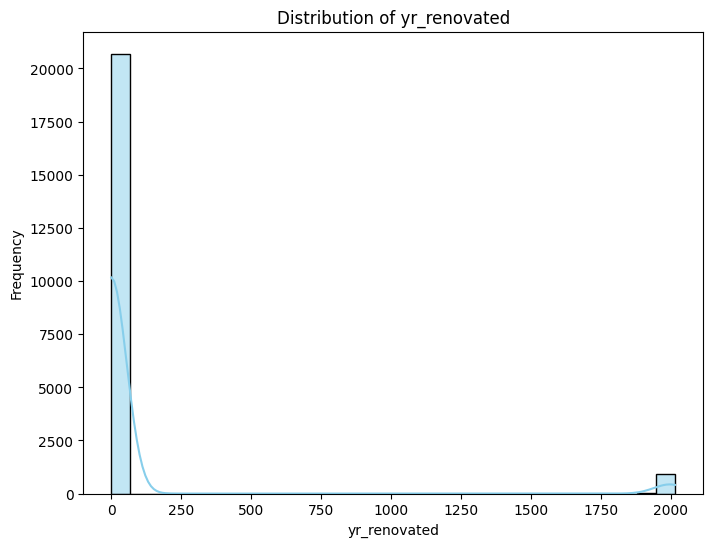

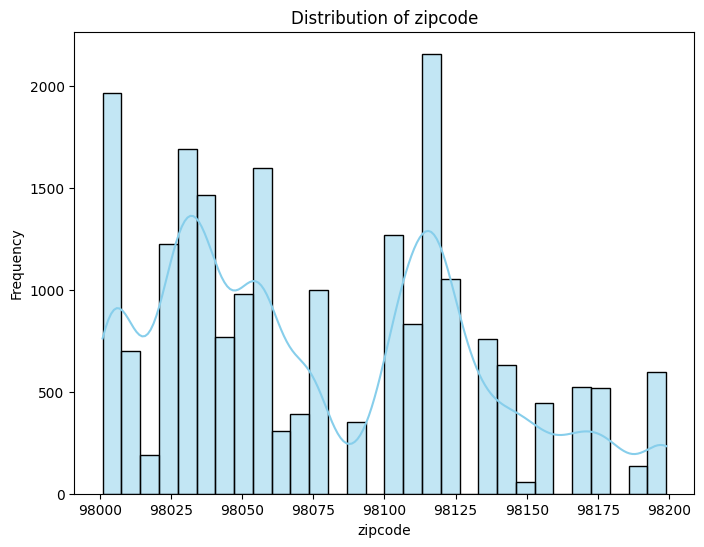

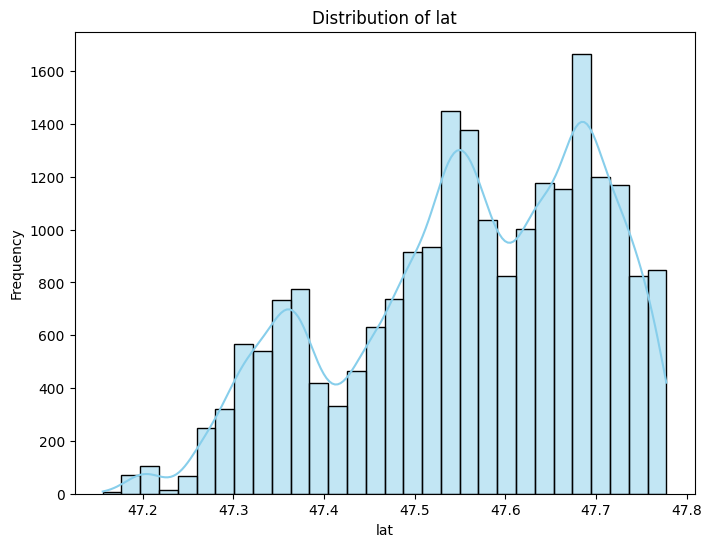

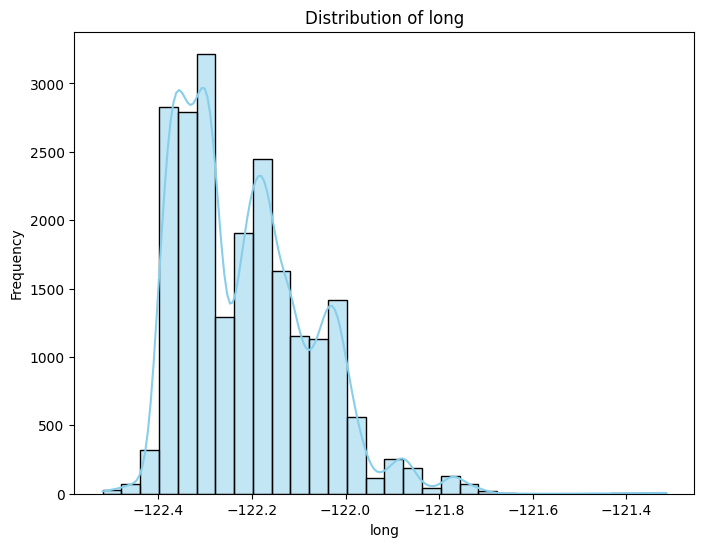

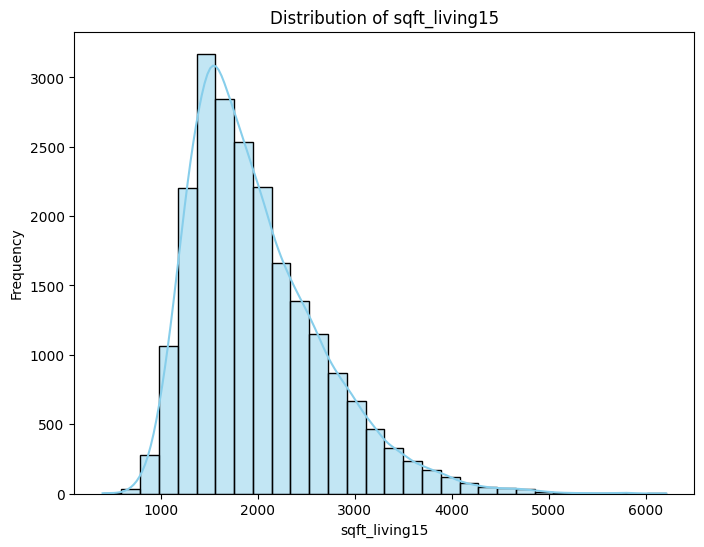

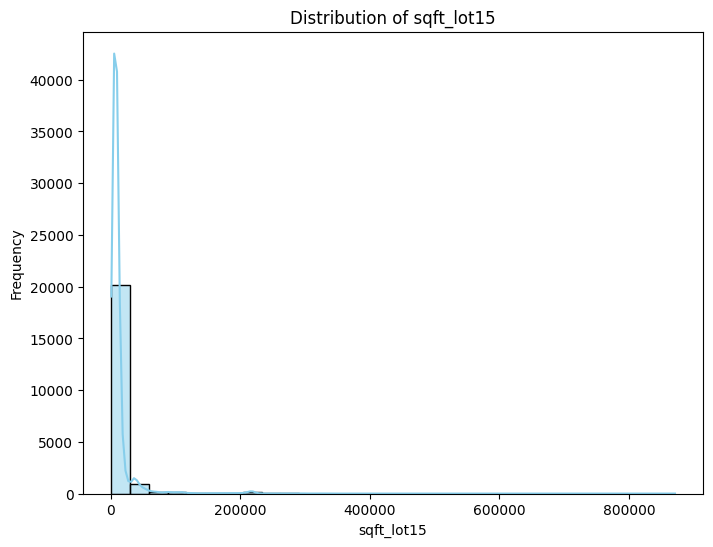

In [52]:
# Visualize distribution of individual features using histograms
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

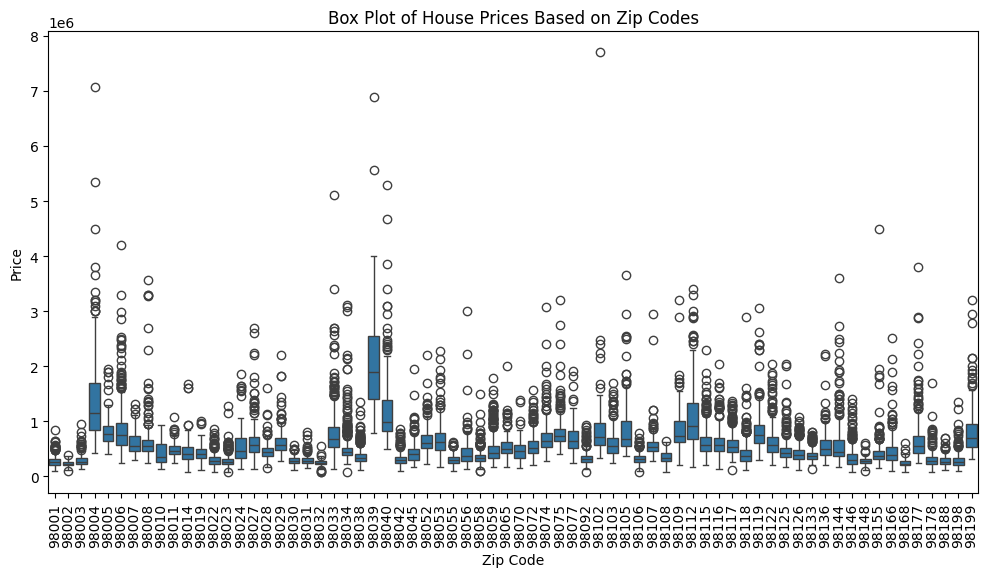

In [56]:
# Box plot of house prices based on zip codes
plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('Box Plot of House Prices Based on Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Predicting a model

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
from sklearn.metrics import mean_squared_error

In [74]:
# Selecting relevant features and target variable
X = df[['zipcode', 'sqft_living']] #selecting zipcode and sqft_living as my features
y = df['price']  # target variable

In [76]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
# Making predictions on the testing set
y_pred = model.predict(X_test)

In [79]:
# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 75516692659.94406


# Explanation about my findings


1   Problem Identification:
    -I wanted to understand why houses have different prices in a certain country.
    -I wondered which factors influence these prices.

2   Data Analysis:
    -I used techniques like histograms and box plots to study factors affecting house prices.
    -By looking at data patterns, I explored how features like zip codes and house sizes relate to prices.

3  Findings:
    -From my analysis, I discovered that certain factors, like location (zip codes) and house size (square footage), play a big role in determining prices.
    -The heatmap helped me visualize the connections between these factors and housing prices more clearly.

4 Predicting a Model:
   -With this understanding, I decided to build a computer model to predict house prices.
   -I trained the model using the data,Adjusting it to improve its accuracy.
    -Eventually, I got the model to make good predictions about house prices based on factors like location and size.

5 Conclusion:
   -Through this process, I gained valuable insights into how the housing market works in a certain country.
   -I now feel more assured about comprehending and maneuvering through the housing market, equipped with insights into the factors that impact prices.

By following these steps, I was able to explore and understand the complex world of housing prices in a certain country, from problem identification to building a predictive model.